In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Recomended_Anime_dataset_path = r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\MyAnimeList-Database-master\data\anime.csv"
Recomended_Anime_dataset_sypnosis_path = r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\MyAnimeList-Database-master\data\anime_with_synopsis.csv"

In [3]:
df_anime = pd.read_csv(Recomended_Anime_dataset_path)
df_anime_sypnosis = pd.read_csv(Recomended_Anime_dataset_sypnosis_path)
df_anime.head(3)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0


In [4]:
df_anime_sypnosis.head(3)

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."


<p style="font-size:40px; color:White;">I. Anime Metadata Exploration</p>

<p style="font-size:30px; color:White;"> 1. Anime count by genre <p>

Comedy           6029
Action           3888
Fantasy          3285
Adventure        2957
Kids             2665
Drama            2619
Sci-Fi           2583
Music            2244
Shounen          2003
Slice Of Life    1914
Romance          1899
School           1642
Supernatural     1479
Hentai           1348
Historical       1144
Mecha            1101
Magic            1081
Seinen            830
Ecchi             767
Mystery           727
Name: count, dtype: int64


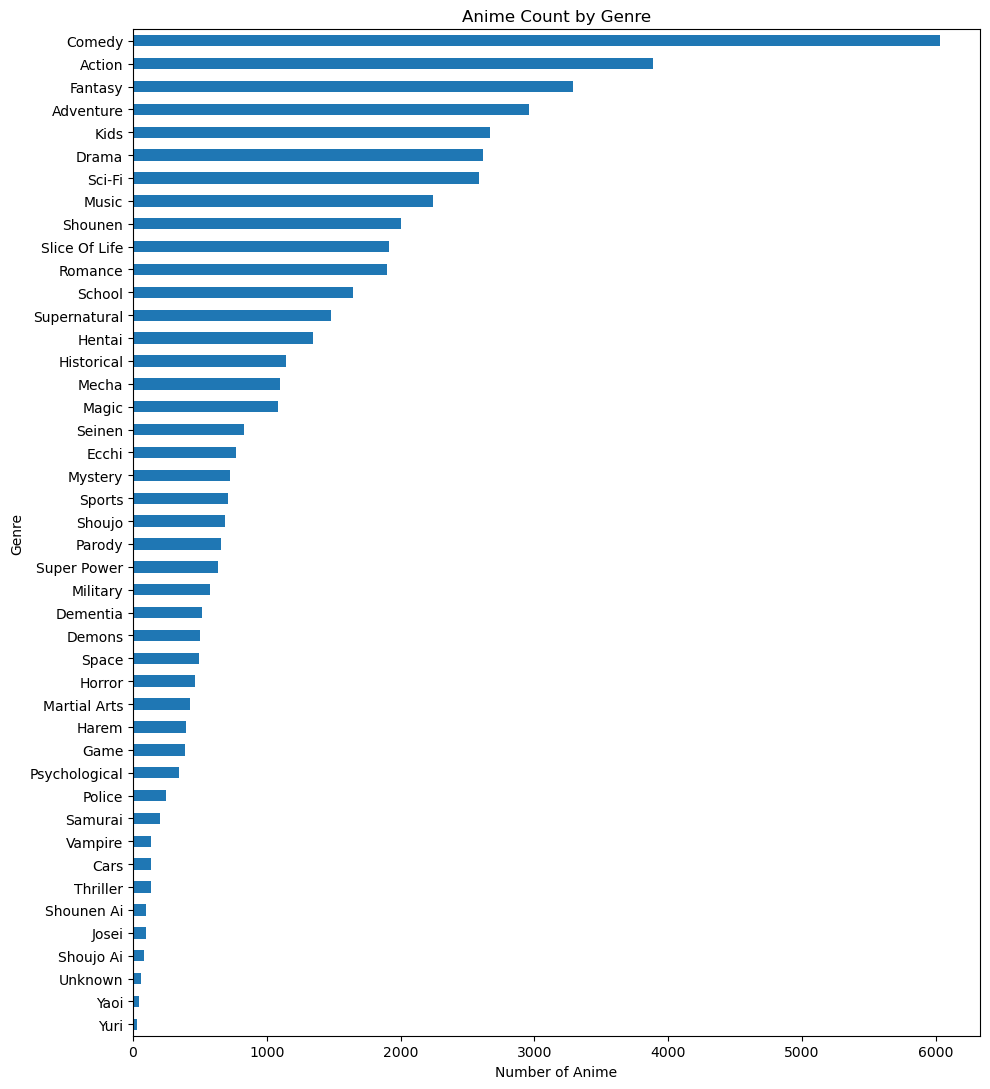

In [5]:
genre_col = next(c for c in df_anime.columns if c.lower() in {"genres", "genre"})
genres = (
    df_anime[genre_col]
    .fillna("")                              # handle NaN
    .str.replace(r"\s+", " ", regex=True)    # normalize spaces
    .str.strip()
    .str.split(r"[|/,]|,\s*")                # split on | or / or comma
)

# --- explode to one genre per row, clean, and count ---
genre_counts = (
    pd.Series([g.strip() for sub in genres for g in (sub or []) if g.strip()])
    .str.title()                             # consistent casing
    .value_counts()
)

# --- optional: inspect counts ---
print(genre_counts.head(20))

# --- bar plot (horizontal works nicely if many genres) ---
plt.figure(figsize=(10, max(4, 0.25 * len(genre_counts))))
genre_counts.sort_values().plot(kind="barh")  # no custom colors/styles
plt.xlabel("Number of Anime")
plt.ylabel("Genre")
plt.title("Anime Count by Genre")
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 2. Distribution of TV vs Movie vs OVA. <p>

Type
TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: count, dtype: int64


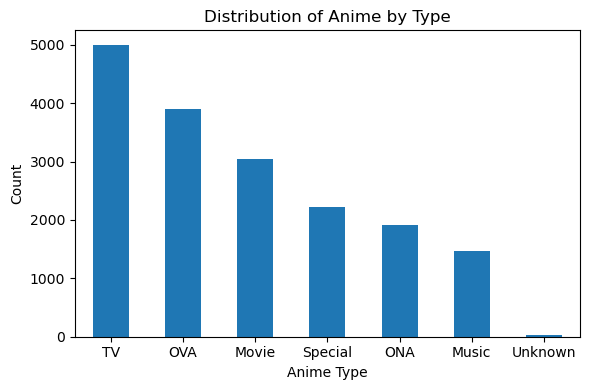

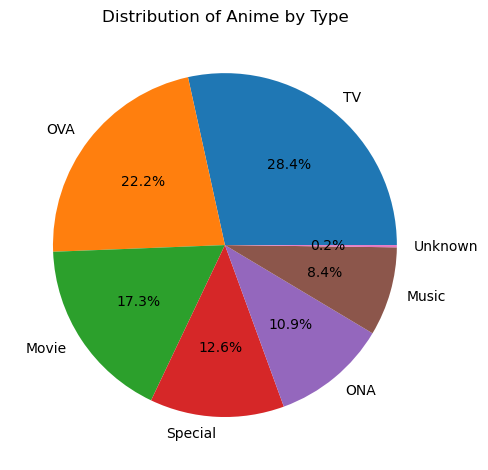

In [6]:
type_col = next(c for c in df_anime.columns if c.lower() in {"type", "types"})

# Count distribution
type_counts = df_anime["Type"].value_counts()

print(type_counts)

# --- Bar plot ---
plt.figure(figsize=(6,4))
type_counts.plot(kind="bar")
plt.xlabel("Anime Type")
plt.ylabel("Count")
plt.title("Distribution of Anime by Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Pie chart (optional) ---
plt.figure(figsize=(5,5))
type_counts.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")  # hide y-label
plt.title("Distribution of Anime by Type")
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 3. Histogram of episode counts <p>

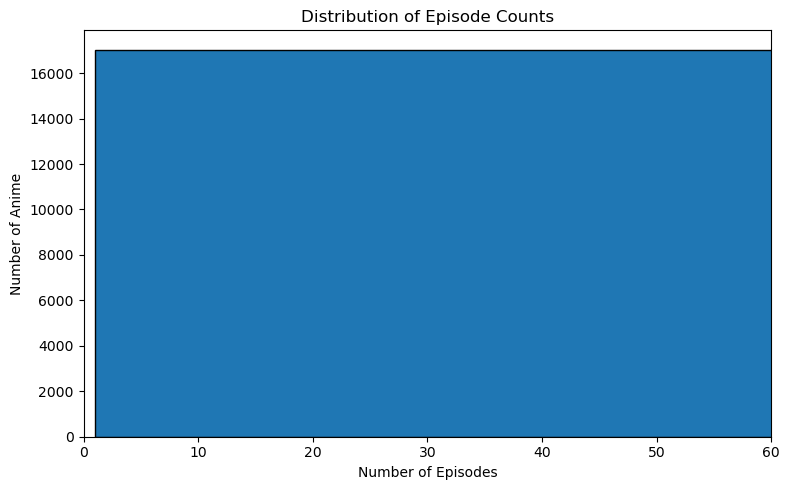

Episodes
1.0     8381
12.0    1445
2.0     1368
13.0     769
3.0      631
26.0     619
4.0      451
6.0      340
24.0     258
52.0     237
Name: count, dtype: int64


In [7]:
ep_col = next(c for c in df_anime.columns if c.lower() in {"episodes", "episode"})

# Convert to numeric (some datasets have '?' or 'Unknown')
df_anime["Episodes"] = pd.to_numeric(df_anime["Episodes"], errors="coerce")

# Drop NaN values
episodes = df_anime["Episodes"].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(episodes, bins=5, edgecolor="black")
plt.xlabel("Number of Episodes")
plt.ylabel("Number of Anime")
plt.title("Distribution of Episode Counts")
plt.xlim(0, 60)  
plt.tight_layout()
plt.show()

# Optional: check the most common counts
print(episodes.value_counts().head(10))

<p style="font-size:30px; color:White;"> 3. Rating Count <p>

Rating
PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
Rx - Hentai                       1345
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: count, dtype: int64


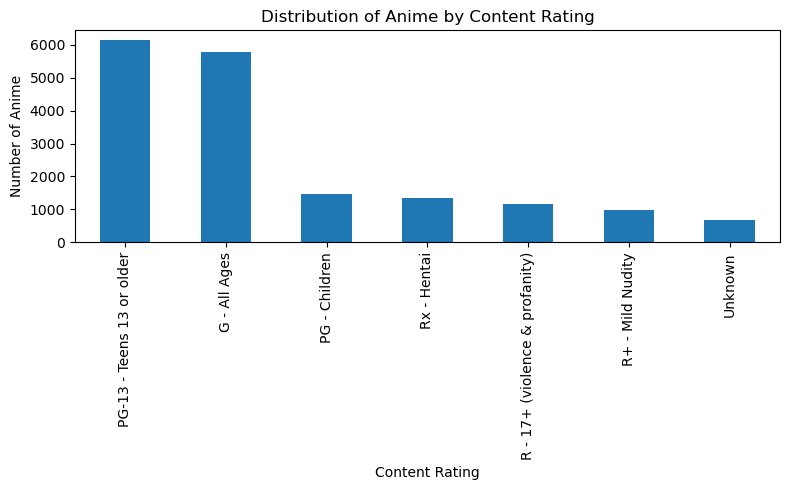

In [8]:
rating_col = next(c for c in df_anime.columns if c.lower() in {"rating", "ratings"})

# Count each rating category
rating_counts = df_anime[rating_col].value_counts()

print(rating_counts)

# Bar plot
plt.figure(figsize=(8,5))
rating_counts.plot(kind="bar")
plt.xlabel("Content Rating")
plt.ylabel("Number of Anime")
plt.title("Distribution of Anime by Content Rating")
plt.tight_layout()
plt.show()


<p style="font-size:30px; color:White;"> 5. Averange score of anime <p>

Average score: 6.51


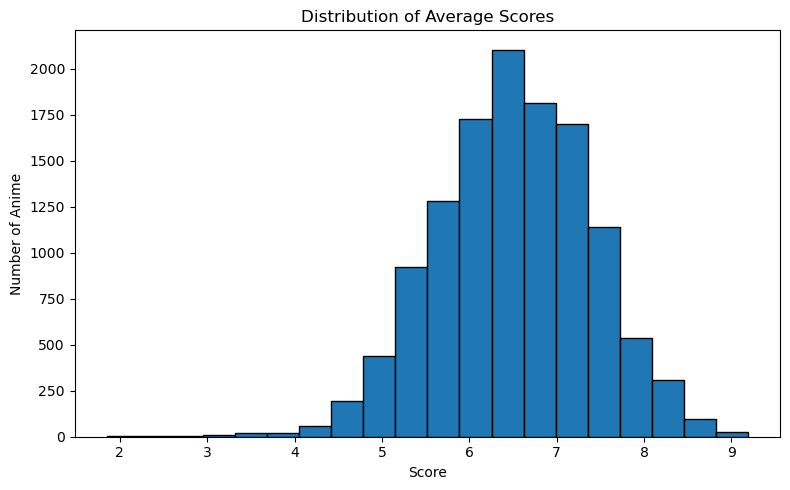

In [9]:
score_col = next(c for c in df_anime.columns if c.lower() in {"score"})

# Convert to numeric and drop NaN
df_anime[score_col] = pd.to_numeric(df_anime[score_col], errors="coerce")
scores = df_anime[score_col].dropna()

# Print average score
print("Average score:", scores.mean().round(2))

# Histogram of scores
plt.figure(figsize=(8,5))
plt.hist(scores, bins=20, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Number of Anime")
plt.title("Distribution of Average Scores")
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 6. Number of anime released per year <p>

C:\Users\Admin\AppData\Local\Temp\ipykernel_12160\2763677643.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_anime["Year"] = pd.to_datetime(df_anime[date_col], errors="coerce").dt.year


Year
1917.0     15
1918.0      7
1924.0      3
1925.0      6
1926.0      6
         ... 
2018.0    396
2019.0    354
2020.0    212
2021.0     83
2022.0      2
Name: count, Length: 101, dtype: int64


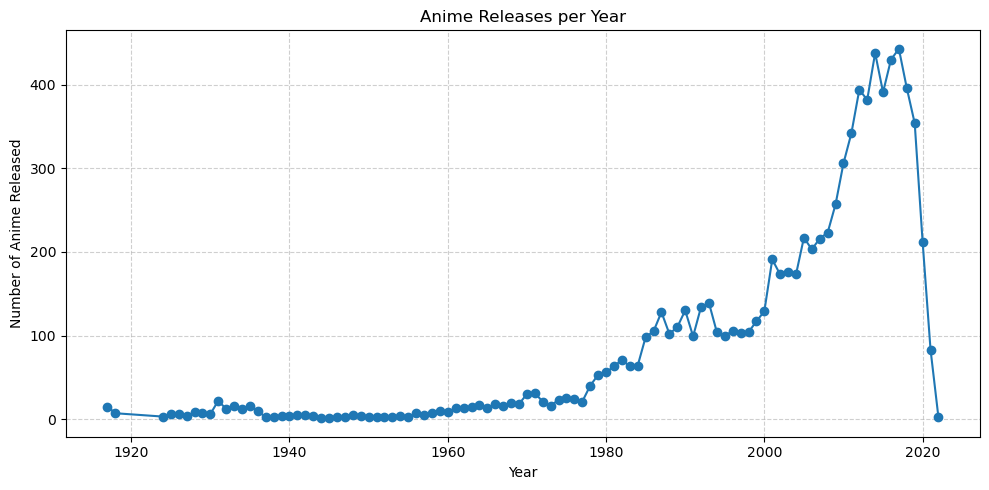

In [10]:
if "year" in [c.lower() for c in df_anime.columns]:
    year_col = next(c for c in df_anime.columns if c.lower() == "year")
    df_anime["Year"] = pd.to_numeric(df_anime[year_col], errors="coerce")

# If instead you have a date column (e.g. "aired" or "start_date"):
elif "aired" in [c.lower() for c in df_anime.columns] or "start_date" in [c.lower() for c in df_anime.columns]:
    date_col = next(c for c in df_anime.columns if c.lower() in {"aired", "start_date"})
    df_anime["Year"] = pd.to_datetime(df_anime[date_col], errors="coerce").dt.year

# --- Count releases per year ---
year_counts = df_anime["Year"].value_counts().sort_index()

print(year_counts.head(105))  # inspect first 20

# --- Line plot ---
plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Anime Released")
plt.title("Anime Releases per Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 7. Anime Count by producer <p>

Producers
Unknown                         7794
NHK                              715
Aniplex                          495
TV Tokyo                         476
Lantis                           445
Bandai Visual                    416
Fuji TV                          332
Movic                            325
Pony Canyon                      315
Sotsu                            301
Dentsu                           293
AT-X                             287
Shueisha                         237
TBS                              236
Kodansha                         228
KlockWorx                        224
Pink Pineapple                   220
Mainichi Broadcasting System     208
DAX Production                   201
Kadokawa Shoten                  197
Sanrio                           193
Genco                            170
TV Asahi                         167
Starchild Records                158
Media Factory                    154
Sony Music Entertainment         154
VAP                         

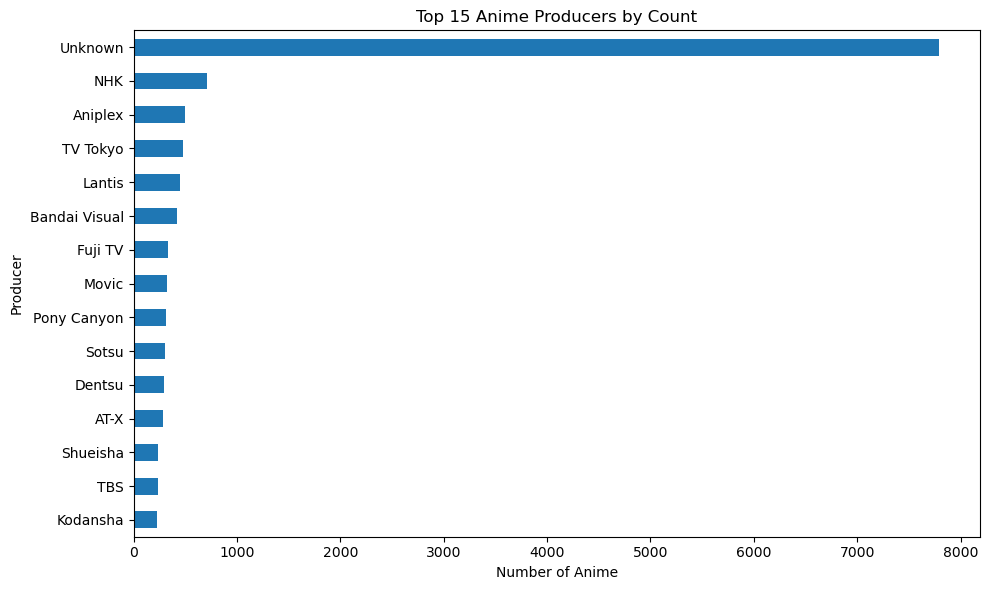

In [11]:
prod_col = next(c for c in df_anime.columns if c.lower() in {"producers", "producer"})

# Split multiple producers into lists
producers = (
    df_anime[prod_col]
    .fillna("")                               # handle NaN
    .str.split(r"[|/,]")                      # split on | , or /
    .explode()                                # one producer per row
    .str.strip()                              # clean whitespace
)

# Drop blanks
producers = producers[producers != ""]

# Count how many anime per producer
producer_counts = producers.value_counts()

print(producer_counts.head(30))  # Top 20 producers

# --- Bar plot of top 15 ---
plt.figure(figsize=(10,6))
producer_counts.head(15).plot(kind="barh")
plt.xlabel("Number of Anime")
plt.ylabel("Producer")
plt.title("Top 15 Anime Producers by Count")
plt.gca().invert_yaxis()  # biggest on top
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 8. Anime Count by Licensors <p>

Licensors
Unknown                              13616
Funimation                            1118
Sentai Filmworks                       744
Discotek Media                         364
ADV Films                              293
Media Blasters                         271
Bandai Entertainment                   201
Aniplex of America                     192
VIZ Media                              174
Geneon Entertainment USA               174
Nozomi Entertainment                   134
Central Park Media                     122
Crunchyroll                             82
NYAV Post                               67
Manga Entertainment                     61
Maiden Japan                            60
Inc.                                    52
NIS America                             52
GKIDS                                   45
The Pokemon Company International       43
4Kids Entertainment                     43
Kitty Media                             37
Saban Entertainment                     34
A

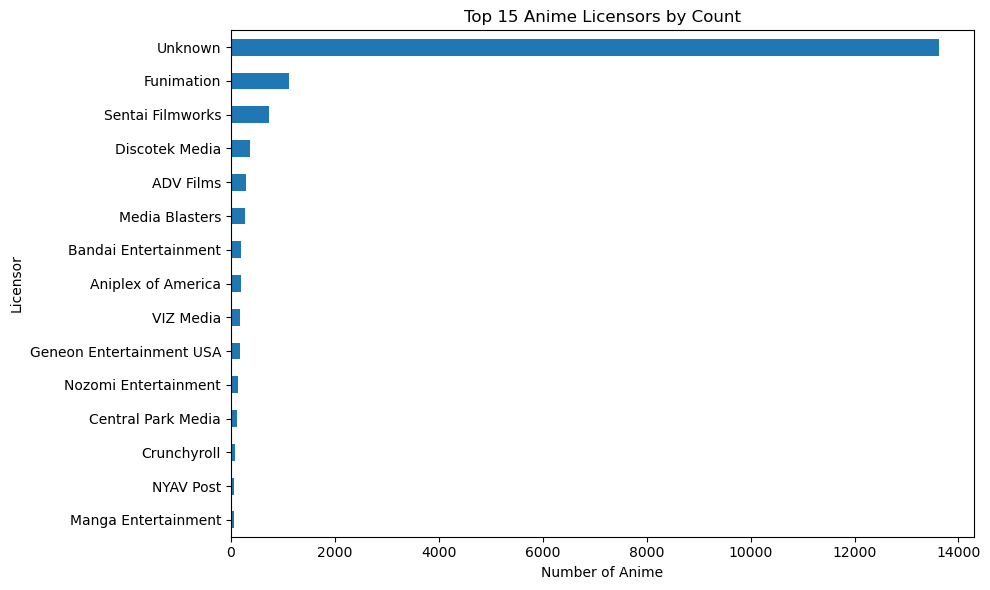

In [12]:
licensors_col = next(c for c in df_anime.columns if c.lower() in {"Licensors", "licensors"})

# Split multiple producers into lists
licensors = (
    df_anime[licensors_col]
    .fillna("")                               # handle NaN
    .str.split(r"[|/,]")                      # split on | , or /
    .explode()                                # one producer per row
    .str.strip()                              # clean whitespace
)

# Drop blanks
licensors = licensors[licensors != ""]

# Count how many anime per producer
licensors_count = licensors.value_counts()

print(licensors_count.head(30))  # Top 20 producers

# --- Bar plot of top 15 ---
plt.figure(figsize=(10,6))
licensors_count.head(15).plot(kind="barh")
plt.xlabel("Number of Anime")
plt.ylabel("Licensor")
plt.title("Top 15 Anime Licensors by Count")
plt.gca().invert_yaxis()  # biggest on top
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 9. Anime Count by Studio <p>

Studios
Unknown                 7079
Toei Animation           778
Sunrise                  502
J.C.Staff                382
Madhouse                 364
Production I.G           335
TMS Entertainment        300
Studio Deen              287
Studio Pierrot           263
OLM                      237
Nippon Animation         217
A-1 Pictures             209
Shin-Ei Animation        178
DLE                      175
Tatsunoko Production     170
Xebec                    155
AIC                      144
Gonzo                    140
Bones                    137
Shaft                    131
Kyoto Animation          124
Satelight                100
SILVER LINK.              99
Brain's Base              96
Production Reed           88
Doga Kobo                 83
Gainax                    81
Arms                      79
Zexcs                     74
Studio 4°C                74
Name: count, dtype: int64


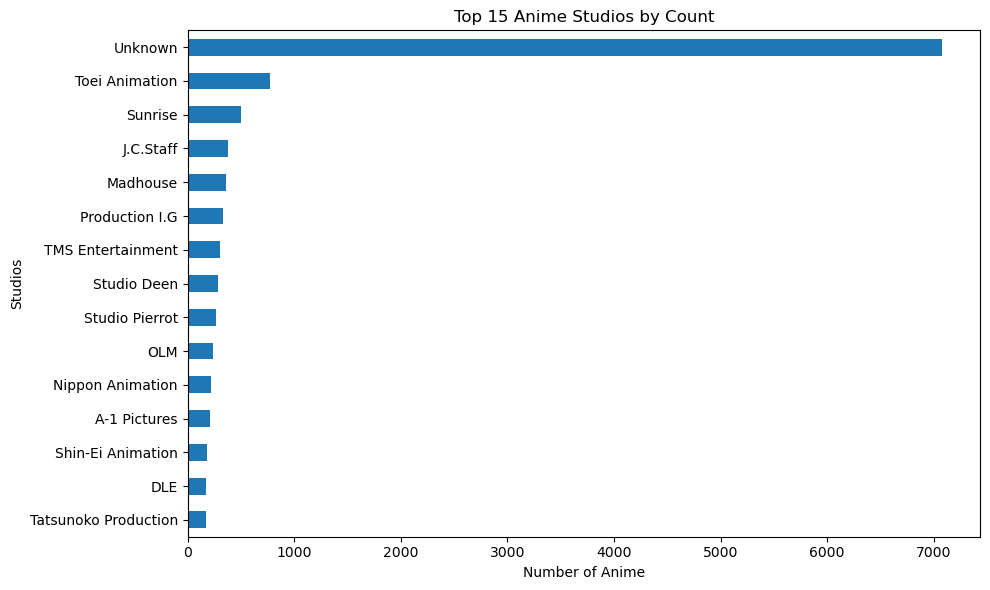

In [13]:
studios_col = next(c for c in df_anime.columns if c.lower() in {"Studios", "studios"})

# Split multiple producers into lists
studios = (
    df_anime[studios_col]
    .fillna("")                               # handle NaN
    .str.split(r"[|/,]")                      # split on | , or /
    .explode()                                # one producer per row
    .str.strip()                              # clean whitespace
)

# Drop blanks
studios = studios[studios != ""]

# Count how many anime per producer
studios_count = studios.value_counts()

print(studios_count.head(30))  # Top 20 producers

# --- Bar plot of top 15 ---
plt.figure(figsize=(10,6))
studios_count.head(15).plot(kind="barh")
plt.xlabel("Number of Anime")
plt.ylabel("Studios")
plt.title("Top 15 Anime Studios by Count")
plt.gca().invert_yaxis()  # biggest on top
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 10.Anime Count by Source <p>

Source
Original         5215
Manga            3825
Unknown          3567
Visual novel      993
Game              880
Light novel       768
Other             597
Novel             510
Music             317
4-koma manga      288
Web manga         252
Picture book      147
Book              112
Card game          64
Digital manga      15
Radio              12
Name: count, dtype: int64


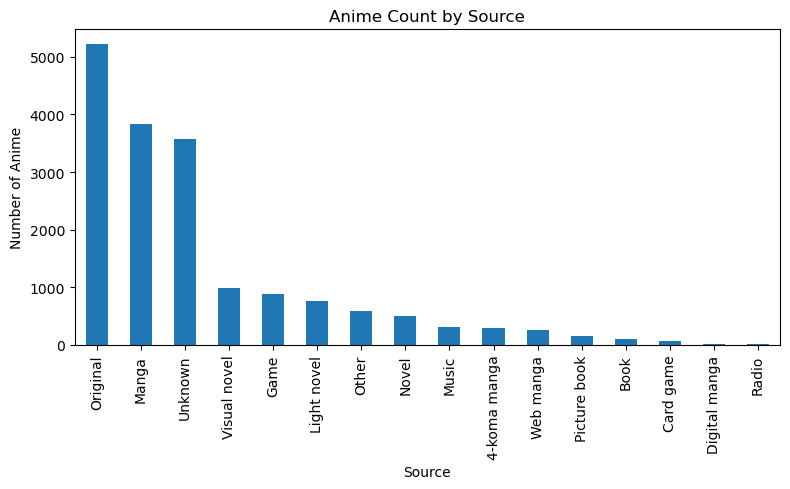

In [14]:
source_col = next(c for c in df_anime.columns if c.lower() in {"source", "sources"})

# Count how many anime per source
source_counts = df_anime[source_col].value_counts()

print(source_counts)

# --- Bar plot ---
plt.figure(figsize=(8,5))
source_counts.plot(kind="bar")
plt.xlabel("Source")
plt.ylabel("Number of Anime")
plt.title("Anime Count by Source")
plt.tight_layout()
plt.show()

<p style="font-size:30px; color:White;"> 11. Top 10 anime ranked <p>

In [15]:
# Make sure Ranked is numeric
df_anime["Ranked"] = pd.to_numeric(df_anime["Ranked"], errors="coerce")

# Drop missing ranks and sort
top10 = df_anime.dropna(subset=["Ranked"]).sort_values("Ranked").head(10)

print(top10[["Ranked", "Name"]])   # replace "Name" with your anime title column


       Ranked                                   Name
16761     0.0  Koukaku Kidoutai: SAC_2045 2nd Season
17548     0.0                The Sun, Moon and Stars
3971      1.0       Fullmetal Alchemist: Brotherhood
15926     2.0   Shingeki no Kyojin: The Final Season
5683      3.0                            Steins;Gate
14963     4.0     Shingeki no Kyojin Season 3 Part 2
9913      5.0                               Gintama°
6474      6.0                 Hunter x Hunter (2011)
741       7.0                   Ginga Eiyuu Densetsu
6006      7.0                               Gintama'


<p style="font-size:30px; color:White;"> 12. Top 10 anime highest popularity <p>

In [16]:
df_anime["Popularity"] = pd.to_numeric(df_anime["Popularity"], errors="coerce")

# Drop rows without rank, sort ascending (1 = top)
Popularity_sorted = df_anime.dropna(subset=["Popularity"]).sort_values("Popularity")

# Print top 5
print(Popularity_sorted[["Popularity", "Name"]].head(10))  

       Popularity                                   Name
16761           0  Koukaku Kidoutai: SAC_2045 2nd Season
17548           0                The Sun, Moon and Stars
1393            1                             Death Note
7449            2                     Shingeki no Kyojin
3971            3       Fullmetal Alchemist: Brotherhood
6614            4                       Sword Art Online
10451           5                          One Punch Man
11185           6                  Boku no Hero Academia
8646            7                            Tokyo Ghoul
10              8                                 Naruto


<p style="font-size:30px; color:White;">12. Top 10 Anime have highest members <p>

In [17]:
df_anime["Members"] = pd.to_numeric(df_anime["Members"], errors="coerce")

# Sort by Members descending
top_members = df_anime.sort_values("Members", ascending=False)

# Print top 10
print(top_members[["Members", "Name"]].head(10))

       Members                              Name
1393   2589552                        Death Note
7449   2531397                Shingeki no Kyojin
3971   2248456  Fullmetal Alchemist: Brotherhood
6614   2214395                  Sword Art Online
10451  2123866                     One Punch Man
11185  1909814             Boku no Hero Academia
8646   1895488                       Tokyo Ghoul
10     1830540                            Naruto
5683   1771162                       Steins;Gate
8148   1751054                   No Game No Life


<p style="font-size:30px; color:White;">12. Top 10 Anime have highest Favorites <p>

In [18]:
df_anime["Favorites"] = pd.to_numeric(df_anime["Favorites"], errors="coerce")

# Sort by Members descending
top_favorites = df_anime.sort_values("Favorites", ascending=False)

# Print top 10
print(top_favorites[["Favorites", "Name"]].head(10))

       Favorites                              Name
3971      183914  Fullmetal Alchemist: Brotherhood
5683      148452                       Steins;Gate
6474      147274            Hunter x Hunter (2011)
1393      145201                        Death Note
7449      129844                Shingeki no Kyojin
11        126645                         One Piece
1431       90487   Code Geass: Hangyaku no Lelouch
1574       84651                Naruto: Shippuuden
20         71308           Neon Genesis Evangelion
11308      71054                    Kimi no Na wa.


<p style="font-size:30px; color:White;"> 14. Top Anime that have most people curently watching <p>

In [19]:
df_anime["Watching"] = pd.to_numeric(df_anime["Watching"], errors="coerce")

# Sort by Members descending
top_watching = df_anime.sort_values("Watching", ascending=False)

# Print top 10
print(top_watching[["Watching", "Name"]].head(10))

       Watching                                  Name
11       887333                             One Piece
15926    566239  Shingeki no Kyojin: The Final Season
16342    533016                   Jujutsu Kaisen (TV)
12493    530324                          Black Clover
1574     362124                    Naruto: Shippuuden
12492    282596       Boruto: Naruto Next Generations
15710    260775      Yakusoku no Neverland 2nd Season
17165    245814                              Horimiya
16401    229258                 Dr. Stone: Stone Wars
6474     227277                Hunter x Hunter (2011)


<p style="font-size:30px; color:White;"> 15. Top Anime that have most people complete <p>

In [20]:
df_anime["Completed"] = pd.to_numeric(df_anime["Completed"], errors="coerce")

# Sort by Members descending
top_watching = df_anime.sort_values("Completed", ascending=False)

# Print top 10
print(top_watching[["Completed", "Name"]].head(10))

       Completed                              Name
7449     2182587                Shingeki no Kyojin
1393     2146116                        Death Note
6614     1907261                  Sword Art Online
10451    1841220                     One Punch Man
11185    1655900             Boku no Hero Academia
3971     1644938  Fullmetal Alchemist: Brotherhood
8646     1594880                       Tokyo Ghoul
10       1462223                            Naruto
11308    1462143                    Kimi no Na wa.
8148     1426896                   No Game No Life


<p style="font-size:30px; color:White;"> 17. Top Anime that have most people On-Hold <p>

In [21]:
df_anime["On-Hold"] = pd.to_numeric(df_anime["On-Hold"], errors="coerce")

# Sort by Members descending
top_on_Hold = df_anime.sort_values("On-Hold", ascending=False)

# Print top 10
print(top_on_Hold[["On-Hold", "Name"]].head(10))

       On-Hold                              Name
11      187919                         One Piece
245     130961                            Bleach
1574    109707                Naruto: Shippuuden
4707    108697                        Fairy Tail
833      87145                           Gintama
6474     79587            Hunter x Hunter (2011)
12493    79487                      Black Clover
3155     77117                        Soul Eater
3971     75728  Fullmetal Alchemist: Brotherhood
1393     75054                        Death Note


<p style="font-size:30px; color:White;"> 18. Top Anime that have most people Dropped <p>

In [22]:
df_anime["Dropped"] = pd.to_numeric(df_anime["Dropped"], errors="coerce")

# Sort by Members descending
top_dropped = df_anime.sort_values("Dropped", ascending=False)

# Print top 10
print(top_dropped[["Dropped", "Name"]].head(10))

       Dropped                             Name
245     174710                           Bleach
4707    148408                       Fairy Tail
11      136245                        One Piece
1574    124253               Naruto: Shippuuden
12492   113677  Boruto: Naruto Next Generations
10       99806                           Naruto
6614     90661                 Sword Art Online
12493    89594                     Black Clover
1393     80834                       Death Note
7939     67845                     Kill la Kill


<p style="font-size:30px; color:White;"> 19. Top Anime that have most people Plan to Watch <p>

In [23]:
df_anime["Plan to Watch"] = pd.to_numeric(df_anime["Plan to Watch"], errors="coerce")

# Sort by Members descending
top_plan_to_watch = df_anime.sort_values("Plan to Watch", ascending=False)

# Print top 10
print(top_plan_to_watch[["Plan to Watch", "Name"]].head(10))

       Plan to Watch                                      Name
5683          425531                               Steins;Gate
0             329800                              Cowboy Bebop
3971          323463          Fullmetal Alchemist: Brotherhood
7013          319373                               Psycho-Pass
16167         285913  Kimetsu no Yaiba Movie: Mugen Ressha-hen
4728          274277                                Durarara!!
6710          269197                                    Hyouka
428           267080                                  Mushishi
2061          266957                                  Baccano!
9             264465                                   Monster


<p style="font-size:30px; color:White;"> 20. Top Anime that have most people score 10 <p>

In [24]:
df_anime["Score-10"] = pd.to_numeric(df_anime["Score-10"], errors="coerce")

# Sort by Members descending
top_score_10= df_anime.sort_values("Score-10", ascending=False)

# Print top 10
print(top_score_10[["Score-10", "Name"]].head(10))

       Score-10                                Name
3971   714811.0    Fullmetal Alchemist: Brotherhood
1393   557406.0                          Death Note
11308  516874.0                      Kimi no Na wa.
7449   470882.0                  Shingeki no Kyojin
5683   468504.0                         Steins;Gate
6474   454000.0              Hunter x Hunter (2011)
9886   393684.0                      Koe no Katachi
10451  360187.0                       One Punch Man
2656   358705.0  Code Geass: Hangyaku no Lelouch R2
14963  327290.0  Shingeki no Kyojin Season 3 Part 2


<p style="font-size:30px; color:White;"> 21. Top Anime that have most people score 9 <p>

In [25]:
df_anime["Score-9"] = pd.to_numeric(df_anime["Score-9"], errors="coerce")

# Sort by Members descending
top_score_9= df_anime.sort_values("Score-9", ascending=False)

# Print top 10
print(top_score_9[["Score-9", "Name"]].head(10))

        Score-9                              Name
1393   535252.0                        Death Note
7449   514879.0                Shingeki no Kyojin
10451  465041.0                     One Punch Man
3971   401507.0  Fullmetal Alchemist: Brotherhood
11308  333022.0                    Kimi no Na wa.
11914  322936.0  Boku no Hero Academia 2nd Season
11185  318675.0             Boku no Hero Academia
1431   309688.0   Code Geass: Hangyaku no Lelouch
9383   308956.0       Shingeki no Kyojin Season 2
6474   304741.0            Hunter x Hunter (2011)


<p style="font-size:30px; color:White;"> 22. Top Anime that have most people score 8 <p>

In [26]:
df_anime["Score-8"] = pd.to_numeric(df_anime["Score-8"], errors="coerce")

# Sort by Members descending
top_score_8= df_anime.sort_values("Score-8", ascending=False)

# Print top 10
print(top_score_8[["Score-8", "Name"]].head(10))

        Score-8                              Name
7449   459113.0                Shingeki no Kyojin
1393   415890.0                        Death Note
11185  414913.0             Boku no Hero Academia
10451  403832.0                     One Punch Man
8646   348603.0                       Tokyo Ghoul
11914  347893.0  Boku no Hero Academia 2nd Season
10     345563.0                            Naruto
8292   311913.0                          Noragami
8148   309230.0                   No Game No Life
6614   305386.0                  Sword Art Online


<p style="font-size:30px; color:White;"> 23. Top Anime that have most people score 7 <p>

In [27]:
df_anime["Score-7"] = pd.to_numeric(df_anime["Score-7"], errors="coerce")

# Sort by Members descending
top_score_7= df_anime.sort_values("Score-7", ascending=False)

# Print top 10
print(top_score_7[["Score-7", "Name"]].head(10))

        Score-7                   Name
6614   303813.0       Sword Art Online
10     286175.0                 Naruto
8646   261579.0            Tokyo Ghoul
11185  253871.0  Boku no Hero Academia
5975   240338.0         Ao no Exorcist
8551   224155.0    Sword Art Online II
7449   220228.0     Shingeki no Kyojin
1393   201522.0             Death Note
8292   199912.0               Noragami
8625   196783.0         Akame ga Kill!


<p style="font-size:30px; color:White;"> 24. Top Anime that have most people score 6 <p>

In [28]:
df_anime["Score-6"] = pd.to_numeric(df_anime["Score-6"], errors="coerce")

# Sort by Members descending
top_score_6= df_anime.sort_values("Score-6", ascending=False)

# Print top 10
print(top_score_6[["Score-6", "Name"]].head(10))

       Score-6                    Name
6614  188431.0        Sword Art Online
8551  152955.0     Sword Art Online II
9664  113336.0          Tokyo Ghoul √A
8646  112177.0             Tokyo Ghoul
10    108155.0                  Naruto
5221  107049.0  Highschool of the Dead
6295  101939.0             Mirai Nikki
5975   99008.0          Ao no Exorcist
8625   98049.0          Akame ga Kill!
4707   84532.0              Fairy Tail


<p style="font-size:30px; color:White;"> 25. Top Anime that have most people score 5 <p>

In [29]:
df_anime["Score-5"] = pd.to_numeric(df_anime["Score-5"], errors="coerce")

# Sort by Members descending
top_score_5= df_anime.sort_values("Score-5", ascending=False)

# Print top 10
print(top_score_5[["Score-5", "Name"]].head(10))

        Score-5                    Name
6614   124819.0        Sword Art Online
8551    96497.0     Sword Art Online II
9664    66311.0          Tokyo Ghoul √A
5221    54874.0  Highschool of the Dead
4707    53280.0              Fairy Tail
6295    51906.0             Mirai Nikki
8646    51649.0             Tokyo Ghoul
8625    49592.0          Akame ga Kill!
10      46886.0                  Naruto
13670   45684.0          Tokyo Ghoul:re


<p style="font-size:30px; color:White;"> 26. Top Anime that have most people score 4 <p>

In [30]:
df_anime["Score-4"] = pd.to_numeric(df_anime["Score-4"], errors="coerce")

# Sort by Members descending
top_score_4= df_anime.sort_values("Score-4", ascending=False)

# Print top 10
print(top_score_4[["Score-4", "Name"]].head(10))

       Score-4                    Name
6614   81155.0        Sword Art Online
8551   62941.0     Sword Art Online II
9664   47884.0          Tokyo Ghoul √A
2271   33122.0             School Days
6295   33063.0             Mirai Nikki
13670  32184.0          Tokyo Ghoul:re
8625   29448.0          Akame ga Kill!
5221   28645.0  Highschool of the Dead
4707   27849.0              Fairy Tail
201    26843.0          Dragon Ball GT


<p style="font-size:30px; color:White;"> 27. Top Anime that have most people score 3 <p>

In [31]:
df_anime["Score-3"] = pd.to_numeric(df_anime["Score-4"], errors="coerce")

# Sort by Members descending
top_score_3= df_anime.sort_values("Score-3", ascending=False)

# Print top 10
print(top_score_3[["Score-3", "Name"]].head(10))

       Score-3                    Name
6614   81155.0        Sword Art Online
8551   62941.0     Sword Art Online II
9664   47884.0          Tokyo Ghoul √A
2271   33122.0             School Days
6295   33063.0             Mirai Nikki
13670  32184.0          Tokyo Ghoul:re
8625   29448.0          Akame ga Kill!
5221   28645.0  Highschool of the Dead
4707   27849.0              Fairy Tail
201    26843.0          Dragon Ball GT


<p style="font-size:30px; color:White;"> 28. Top Anime that have most people score 2 <p>

In [32]:
df_anime["Score-2"] = pd.to_numeric(df_anime["Score-2"], errors="coerce")

# Sort by Members descending
top_score_2= df_anime.sort_values("Score-2", ascending=False)

# Print top 10
print(top_score_2[["Score-2", "Name"]].head(10))

       Score-2                             Name
6614   25371.0                 Sword Art Online
2271   22344.0                      School Days
8551   21288.0              Sword Art Online II
8058   14764.0                             Pupa
9664   13773.0                   Tokyo Ghoul √A
7680   11505.0                  Diabolik Lovers
6295    9683.0                      Mirai Nikki
12492   9479.0  Boruto: Naruto Next Generations
1490    9129.0                     Boku no Pico
14495   9077.0        Tokyo Ghoul:re 2nd Season


<p style="font-size:30px; color:White;"> 29. Top Anime that have most people score 1 <p>

In [33]:
df_anime["Score-1"] = pd.to_numeric(df_anime["Score-1"], errors="coerce")

# Sort by Members descending
top_score_1= df_anime.sort_values("Score-1", ascending=False)

# Print top 10
print(top_score_1[["Score-1", "Name"]].head(10))

       Score-1                              Name
1490   33750.0                      Boku no Pico
2271   25046.0                       School Days
8058   23622.0                              Pupa
6614   23472.0                  Sword Art Online
387    22048.0                   Hametsu no Mars
3971   16806.0  Fullmetal Alchemist: Brotherhood
8551   16529.0               Sword Art Online II
15172  15346.0                            Ex-Arm
12492  13039.0   Boruto: Naruto Next Generations
2934   11816.0      Tenkuu Danzai Skelter+Heaven


<p style="font-size:40px; color:White;"> II.Relationships & Patterns <p>

<p style="font-size:30px; color:White;"> 30. Which genres often co-occur <p>

In [34]:
genre_col = next(c for c in df_anime.columns if c.lower() in {"genres", "genre"})

# Split genres into lists
df_anime["GenreList"] = (
    df_anime[genre_col]
    .fillna("")
    .str.split(r"[|/,]")   # split on | , /
)

# Build a binary "one-hot encoded" genre matrix
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(
    mlb.fit_transform(df_anime["GenreList"]),
    columns=mlb.classes_,
    index=df_anime.index
)

# Compute co-occurrence by multiplying matrix with its transpose
co_occurrence = genre_matrix.T.dot(genre_matrix)

# Zero out diagonal (self-co-occurrence not useful)
for g in co_occurrence.columns:
    co_occurrence.loc[g, g] = 0

# Show top pairs
pairs = (
    co_occurrence.unstack()
    .sort_values(ascending=False)
    .reset_index()
)
pairs.columns = ["Genre1", "Genre2", "Count"]
pairs_unique = pairs[pairs["Genre1"] < pairs["Genre2"]]

# Sort by count descending
top_pairs = pairs_unique.sort_values("Count", ascending=False)

print(top_pairs.head(20))  # 



           Genre1         Genre2  Count
0          Sci-Fi         Action   1303
3       Adventure         Action   1256
4         Fantasy         Action   1149
7          Comedy         Action   1119
8         Shounen         Action    910
10         Comedy        Shounen    718
13         Comedy        Fantasy    716
14          Mecha         Sci-Fi    702
16          Mecha         Action    688
18        Fantasy      Adventure    658
21          Drama         Action    653
23      Adventure        Fantasy    622
24   Supernatural         Action    586
26         Comedy      Adventure    567
28        Fantasy          Magic    557
31         School         Comedy    539
33        Romance         Comedy    528
35      Adventure         Comedy    523
36         Comedy  Slice of Life    520
39        Fantasy        Shounen    465


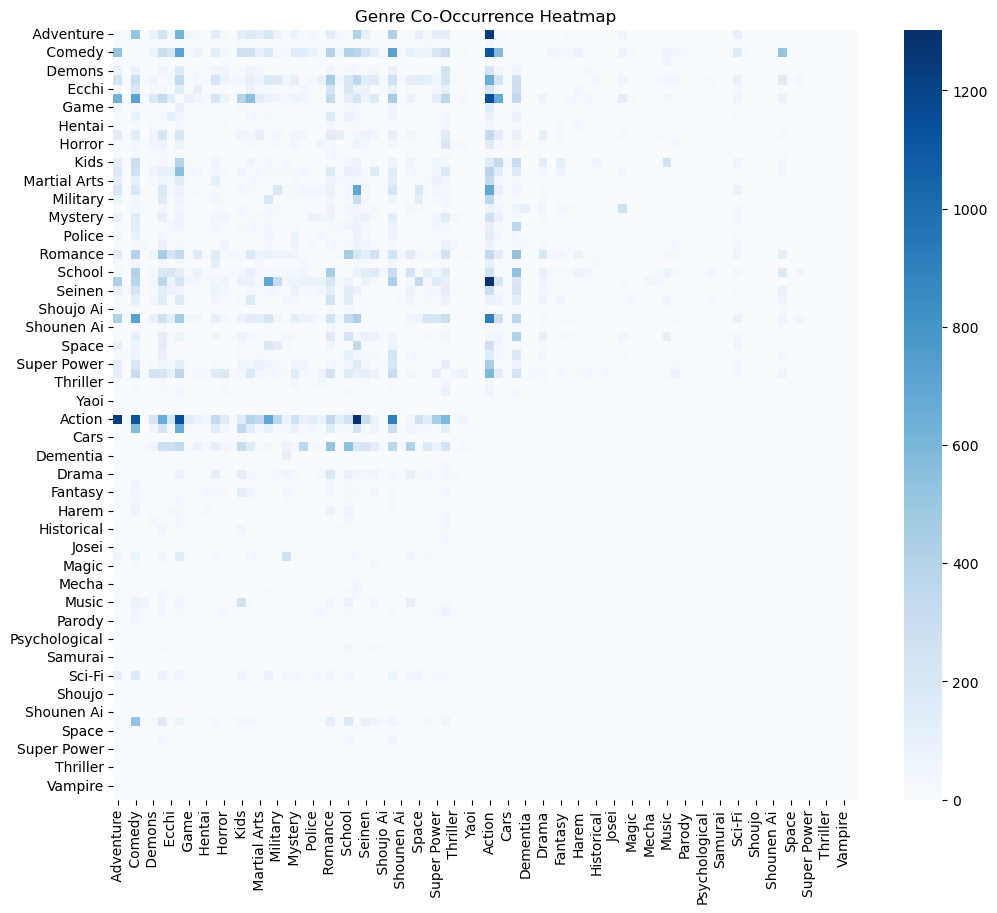

In [35]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence, cmap="Blues")
plt.title("Genre Co-Occurrence Heatmap")
plt.show()

<p style="font-size:30px; color:White;"> 31. Do higher score have higher member count <p>

Correlation between Score and Members: 0.406


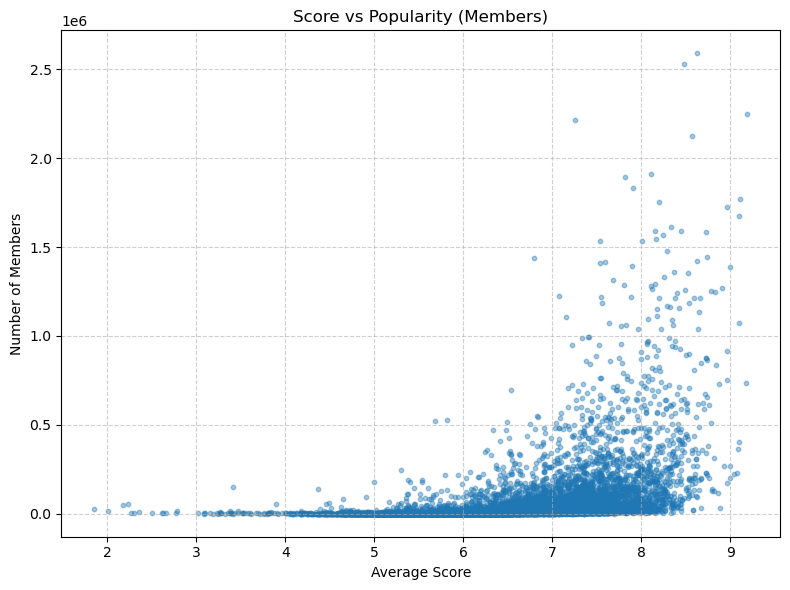

In [36]:
df_anime["Score"] = pd.to_numeric(df_anime["Score"], errors="coerce")
df_anime["Members"] = pd.to_numeric(df_anime["Members"], errors="coerce")

# Drop missing values
data = df_anime.dropna(subset=["Score", "Members"])

# Compute correlation
corr = data["Score"].corr(data["Members"])
print("Correlation between Score and Members:", round(corr, 3))

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data["Score"], data["Members"], alpha=0.4, s=10)
plt.xlabel("Average Score")
plt.ylabel("Number of Members")
plt.title("Score vs Popularity (Members)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<p style="font-size:30px; color:White;"> 32. Average rating by year <p>

Year
1963.0    6.297500
1965.0    6.215000
1966.0    6.240000
1967.0    6.415000
1968.0    6.560000
1969.0    6.581111
1970.0    6.708571
1971.0    6.366000
1972.0    6.406667
1973.0    6.564545
1974.0    6.452857
1975.0    6.580000
1976.0    6.368000
1977.0    6.562381
1978.0    7.039444
1979.0    6.742778
1980.0    6.730000
1981.0    6.740769
1982.0    6.726818
1983.0    6.755312
1984.0    6.570345
1985.0    6.940000
1986.0    6.842500
1987.0    6.836500
1988.0    6.681071
1989.0    6.948000
1990.0    6.963750
1991.0    6.825556
1992.0    6.831852
1993.0    7.078000
1994.0    6.833000
1995.0    7.110909
1996.0    7.212647
1997.0    6.817297
1998.0    6.764638
1999.0    6.829615
2000.0    6.847593
2001.0    6.838571
2002.0    6.905443
2003.0    6.838351
2004.0    6.928017
2005.0    6.992477
2006.0    6.973503
2007.0    7.114231
2008.0    7.193095
2009.0    7.173636
2010.0    7.103558
2011.0    7.042815
2012.0    7.151597
2013.0    6.940412
2014.0    6.987447
2015.0    6.865291
2016.0 

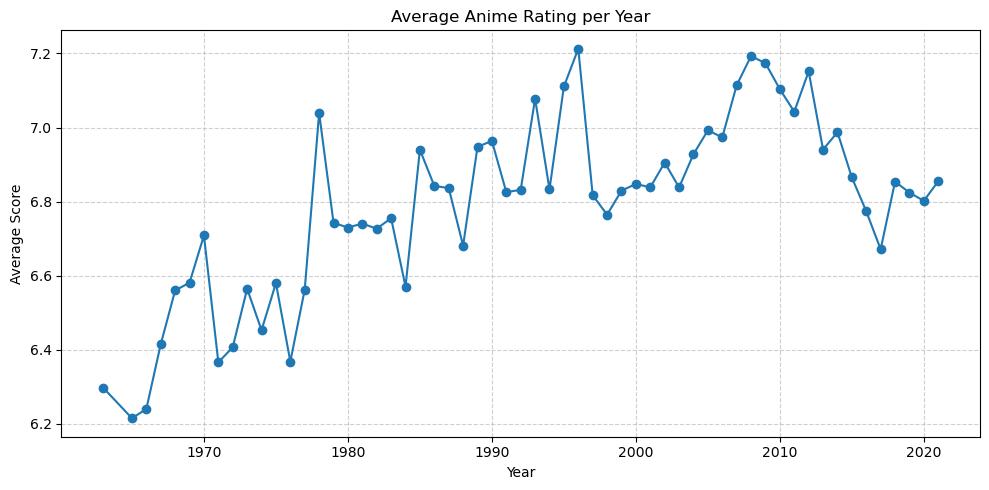

In [37]:

df_anime["Year"] = df_anime["Premiered"].str.extract(r"(\d{4})")
df_anime["Year"] = pd.to_numeric(df_anime["Year"], errors="coerce")

# --- Clean Score ---
df_anime["Score"] = pd.to_numeric(df_anime["Score"], errors="coerce")

# --- Group by year and compute mean score ---
avg_rating_per_year = (
    df_anime.dropna(subset=["Year", "Score"])
      .groupby("Year")["Score"]
      .mean()
)

print(avg_rating_per_year.head(60))

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.title("Average Anime Rating per Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<p style="font-size:40px; color:White;"> III. Missing value <p>

In [38]:
missing_counts = df_anime.isna().sum()

# Also show percentage missing
missing_percent = (df_anime.isna().mean() * 100).round(2)

# Combine into one table
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

print(missing_summary)


               Missing Count  Missing %
Year                   12817      72.98
Score                   5141      29.27
Score-9                 3167      18.03
Ranked                  1762      10.03
Score-2                 1597       9.09
Score-8                 1371       7.81
Score-3                  977       5.56
Score-4                  977       5.56
Score-5                  584       3.33
Episodes                 516       2.94
Score-6                  511       2.91
Score-7                  503       2.86
Score-1                  459       2.61
Score-10                 437       2.49
On-Hold                    0       0.00
Dropped                    0       0.00
MAL_ID                     0       0.00
Plan to Watch              0       0.00
Watching                   0       0.00
Completed                  0       0.00
Members                    0       0.00
Favorites                  0       0.00
Name                       0       0.00
Popularity                 0       0.00


In [39]:
missing_counts = df_anime_sypnosis.isna().sum()

# Also show percentage missing
missing_percent = (df_anime_sypnosis.isna().mean() * 100).round(2)

# Combine into one table
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

print(missing_summary)


           Missing Count  Missing %
sypnopsis              8       0.05
MAL_ID                 0       0.00
Name                   0       0.00
Score                  0       0.00
Genres                 0       0.00


<p style="font-size:30px; color:White;"> Outliners <p>


--- EPISODES ---
Outlier count: 1433
11985    29.0
1419     29.0
4433     29.0
7191     29.0
791      29.0
4810     29.0
3341     29.0
10958    29.0
8154     29.0
3226     29.0
Name: Episodes, dtype: float64

--- MEMBERS ---
Outlier count: 2851
7025     32566
968      32578
5645     32617
11400    32678
14105    32679
12666    32679
7376     32693
995      32694
7651     32694
4976     32746
Name: Members, dtype: int64

--- POPULARITY ---
Outlier count: 0
Series([], Name: Popularity, dtype: int64)

--- YEAR ---
Outlier count: 262
7108    1961.0
7109    1962.0
2529    1963.0
7681    1963.0
3941    1963.0
5213    1963.0
2470    1963.0
6821    1964.0
5845    1964.0
8191    1964.0
Name: year, dtype: float64


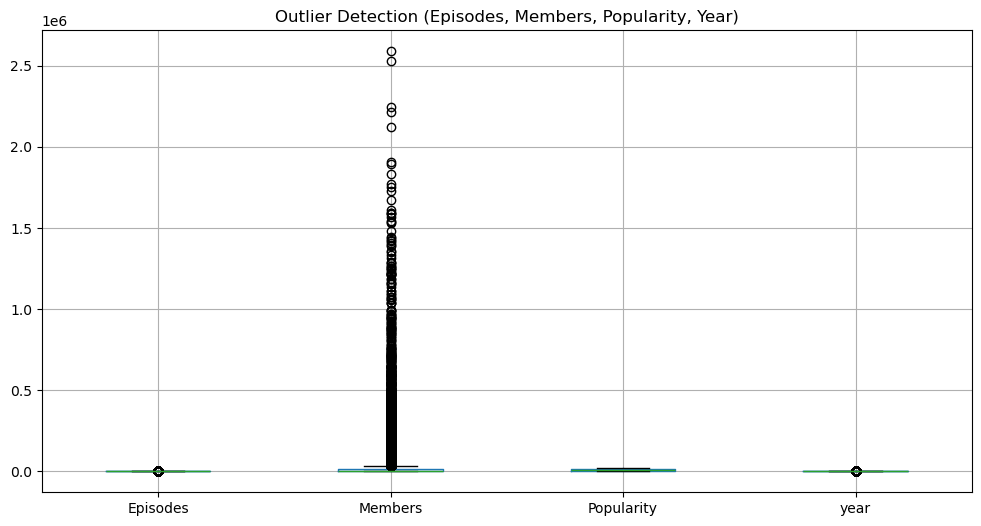

In [40]:

df_anime["year"] = df_anime["Premiered"].str.extract(r"(\d{4})")
df_anime["year"] = pd.to_numeric(df_anime["year"], errors="coerce")

# Columns to check
cols = ["Episodes", "Members", "Popularity", "year"]

# Ensure numeric
for c in cols:
    df_anime[c] = pd.to_numeric(df_anime[c], errors="coerce")

# Function: IQR outlier detection
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Detect outliers
outliers = {}
for c in cols:
    outliers[c] = detect_outliers(df_anime[c].dropna())

# Print summary
for c in cols:
    print(f"\n--- {c.upper()} ---")
    print(f"Outlier count: {len(outliers[c])}")
    print(outliers[c].sort_values().head(10))  # show first few

# Boxplot visualization
plt.figure(figsize=(12,6))
df_anime[cols].boxplot()
plt.title("Outlier Detection (Episodes, Members, Popularity, Year)")
plt.show()

In [14]:
import pandas as pd

cleaned = pd.read_excel(r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\anime_cleaned.xlsx")
original = pd.read_csv(r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\MyAnimeList-Database-master\data\anime.csv", sep=",", engine="python")
subset = cleaned[["title", "anime_url", "main_pic"]]
merged = original.merge(subset, left_on="Name", right_on="title", how="left")
merged = merged.drop(columns=["title"])
merged.to_csv("anime_merged.csv", index=False)


In [15]:
print(merged.columns.tolist())

['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'anime_url', 'main_pic']


In [2]:
import pandas as pd

cleaned = pd.read_excel(r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\anime_cleaned.xlsx")
original = pd.read_csv(r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\MyAnimeList-Database-master\data\anime.csv", sep=",", engine="python")
subset = cleaned[["title", "anime_url", "main_pic"]]
merged = original.merge(subset, left_on="Name", right_on="title", how="left")
merged = merged.drop(columns=["title"])
synosis = pd.read_csv(r"G:\hoc\private\Anime\data\Recomended_Anime_data\raw\MyAnimeList-Database-master\data\anime_with_synopsis.csv", sep=",", engine="python")
subset = synosis[["Name", "sypnopsis"]]
merged = merged.merge(subset, left_on="Name", right_on="Name", how="left")
merged.to_csv("anime_merged.csv", index=False)
